<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/BinaryClassificationPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x , y= mnist.data, mnist.target
print(x.shape, y.shape)

import numpy as np
x=np.array(x)
y=np.array(y)

(70000, 784) (70000,)


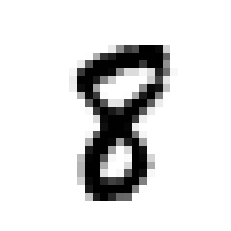

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x[69420]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y = y.astype(np.uint8)
x_train, x_test, y_train, y_test= x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
##training a binary classifier at first
## our model will predict if the number is 7 or not
y_train_7= (y_train==7)
y_test_y= (y_test==7)

## we venture out starting with SGD which is also good for ONLINE LEARNING!!!
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(random_state=42)
clf.fit(x_train, y_train_7)

SGDClassifier(random_state=42)

**Evaluating a classifier is often significantly trickier than evaluating a regressor**

In [9]:
### CROSS VALIDATION FROM SCRATCH
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(x_train, y_train_7):
  clone_clf = clone(clf)
  X_train_folds = x_train[train_index]
  y_train_folds = y_train_7[train_index]
  X_test_fold = x_train[test_index]
  y_test_fold = y_train_7[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.98105
0.9735
0.95335


In [10]:
##over 90% accuracy! This is simply because only about 10% of the
##images are 5s, so if you always guess that an image is not a 5, you will be right about
##90% of the time. Beats Nostradamus.

##This demonstrates why accuracy is generally not the preferred performance measure
##for classifiers, especially when you are dealing with skewed datasets (i.e., when some
##classes are much more frequent than others).


**CONFUSION MATRIX**


In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,
                                 x_train,
                                 y_train_7
                                 , cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_pred)

array([[52581,  1154],
       [  688,  5577]])

In [12]:
## 00- is 5`, predicted 5`-> true negative
## 01- is 5`, predicted 5-> false positive
## 10- is 5, predicted 5`-> false negative
## 11- is 5, predicted 5-> true positive

##better to look at precision
## TP/(TP+FP)

##to be used with another metric called recall
## TP/(TP + FN

from sklearn.metrics import precision_score, recall_score
precision= precision_score(y_train_7, y_train_pred) 
recall= recall_score(y_train_7, y_train_pred)
print( precision, recall)

0.8285544495617293 0.8901835594573024


In [13]:
## precision aint so glorious afterall
## best is to combine the two metrics in what is called as f1 score
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_pred)

0.8582640812557709

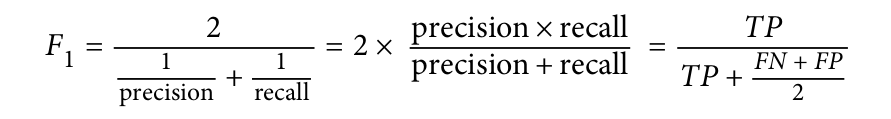

But there also exists a precision/recall trade-off and sometimes we will only care about precision( adult videos filter) while other times recall( shoplifter classifier)

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_pred)

0.8582640812557709

The tradeoff bw recall and precision is clear. The only parameter in hand is threshold. Scikit doesnt let us manually pick the threshold however

In [18]:
##recall vs precision

y_scores = cross_val_predict(clf, x_train, y_train_7, cv=3,
                              method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)



so for a precision of 90%, corresponding recall is:  0.8311252992817239  and corresponding threshold is:  2287.000762087095


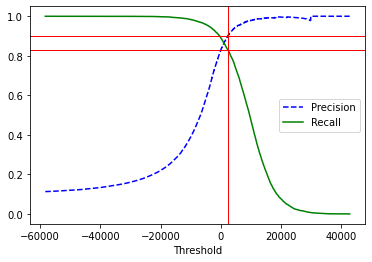

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(['Precision', 'Recall'])
  plt.xlabel('Threshold')
  t_val= np.interp(0.9, precisions[:-1], thresholds)
  plt.axhline(y = 0.9, color = 'r', linestyle = '-', linewidth=1)
  plt.axvline(x= t_val, color='r', linestyle='-', linewidth=1)
  r_val= np.interp(t_val, thresholds, recalls[:-1])
  plt.axhline(y = r_val, color = 'r', linestyle = '-', linewidth=1)
  print('so for a precision of 90%, corresponding recall is: ', r_val,' and corresponding threshold is: ', t_val)


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [29]:
##as a thumb of rule, recalls drops with threshold
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #calculates smallest threshold for 90% precision
y_train_pred_90 = (y_scores >= threshold_90_precision)

print('precision: ', precision_score(y_train_7, y_train_pred_90))
print('recall:', recall_score(y_train_7, y_train_pred_90))

precision:  0.9000864304235091
recall: 0.8311252992817239


**The Reciever Operator Characterstic Curve**
The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

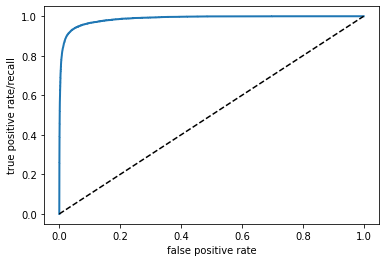

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate/recall')

plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
##again there is a trade off. Higher the recall, higher is the false positive rate. the dotted line represents a pure random classifier. A good classifier stays as far from
##the line as possible in the top left corner
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7, y_scores)

0.986670497551944

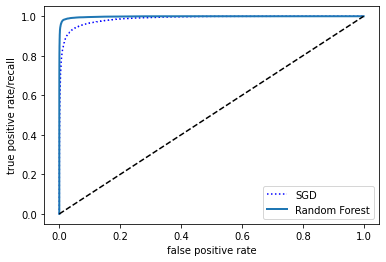

In [34]:
## Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC
## score to the SGDClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_7, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7,y_scores_forest)


plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [35]:
roc_auc_score(y_train_7, y_scores_forest)

0.9982747530426836

In [36]:
##random forest seems to be performing better

from sklearn.metrics import precision_recall_curve
forest_precisions, forest_recalls, forest_thresholds = precision_recall_curve(y_train_7, y_scores_forest)

threshold_90_precision_forest = forest_thresholds[np.argmax(forest_precisions >= 0.90)] #calculates smallest threshold for 90% precision
y_train_pred_90_forest = (y_scores_forest >= threshold_90_precision_forest)

print('precision: ', precision_score(y_train_7, y_train_pred_90_forest))
print('recall:', recall_score(y_train_7, y_train_pred_90_forest))

precision:  0.9038574793875147
recall: 0.9798882681564246


In [ ]:
##Significamt improvement reported